# <u>Data Visualisation on lung cancer! </u>
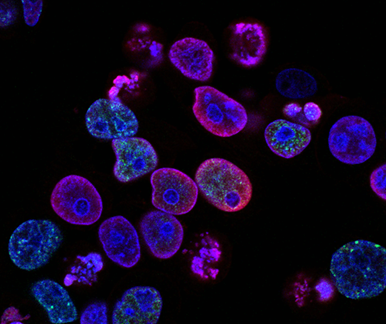

# General relevant modules

In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

In [108]:
# Reading the data from the data.csv file and converting into pandas dataframe
cancer = pd.read_csv("data.csv")
cancer.head(25)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
5,P102,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
6,P103,52,2,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
7,P104,28,2,3,1,4,3,2,3,4,...,3,2,2,4,2,2,3,4,3,Low
8,P105,35,2,4,5,6,5,6,5,5,...,1,4,3,2,4,6,2,4,1,Medium
9,P106,46,1,2,3,4,2,4,3,3,...,1,2,4,6,5,4,2,1,5,Medium


## Plotter Function

In [96]:
def Plotter(plot, x_label, y_label, x_rot=None, y_rot=None,  fontsize=12, fontweight=None, legend=True, save=False,save_name=None):
    #Ticks
    ax.tick_params(direction='out', length=5, width=3, colors='k',grid_color='k', grid_alpha=1,grid_linewidth=2)
    plt.xticks(fontsize=fontsize, fontweight=fontweight, rotation=x_rot)
    plt.yticks(fontsize=fontsize, fontweight=fontweight, rotation=y_rot)

    #Legend
    if legend==True:
        plt.legend()
    else:
        ax.legend().remove()
        
    #Labels
    plt.xlabel(x_label, fontsize=fontsize, fontweight=fontweight, color='k')
    plt.ylabel(y_label, fontsize=fontsize, fontweight=fontweight, color='k')

    #Removing Spines and setting up remianing, preset prior to use.
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(3)
    
    if save==True:
        plt.savefig(save_name)

No handles with labels found to put in legend.


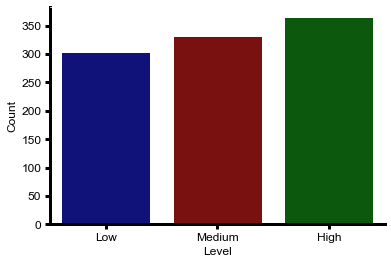

In [97]:
# Plot for Count vs Level
fig, ax=plt.subplots()
plot=sns.countplot(data=cancer, x='Level', palette=['darkblue','darkred','darkgreen'])
Plotter(plot, 'Level', 'Count', legend=None, save=True, save_name='Level Count.png')
plot;

<font size="4">As we can conclude from the graph the data is fairly balanced. So we further analyze by breaking it out by gender.</font>

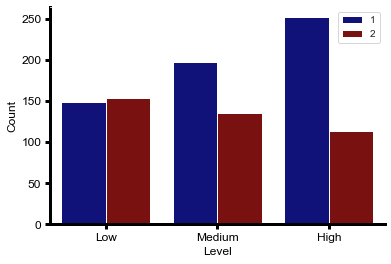

In [98]:
# Plot for Level vs Gender
fig, ax=plt.subplots()
plot=sns.countplot(data=cancer, x='Level', hue='Gender', palette=['darkblue','darkred'])
Plotter(plot, 'Level', 'Count', legend=True, save=True, save_name='Level Count by Gender.png')
plot;


<font size="4">From the graph, we can see that gender one has higher representation than gender two. After this we start by looking to see the correlation between alcohol use and fatique. </font>


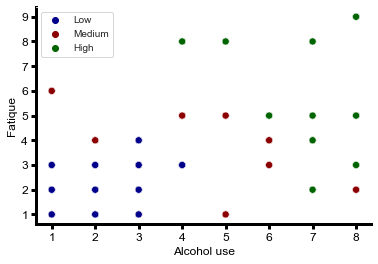

In [99]:
# Plot for Alcohol Use vs Fatigue Level
fig, ax=plt.subplots()
plot=sns.scatterplot(data=cancer, x='Alcohol use',y='Fatigue', hue='Level', palette=['darkblue','darkred','darkgreen'], s=50, marker='o')
Plotter(plot, 'Alcohol use', 'Fatique', legend=True, save=True, save_name='Level Dependence on Alcohol and Fatigue.png')
plot;

<font size="4"> There are two different clusters for low and high levels by alcohol use and fatique while medium is a combination of both. </font>



No handles with labels found to put in legend.


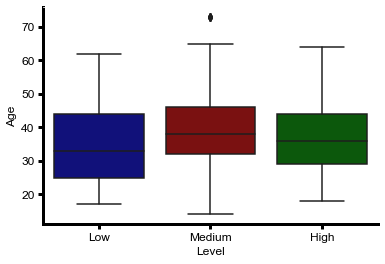

In [100]:
# Plot for Level vs Age 
fig, ax=plt.subplots()
plot=sns.boxplot(data=cancer, x='Level', y='Age', palette=['darkblue','darkred','darkgreen'])
Plotter(plot, 'Level', 'Age', legend=False, save=True, save_name='Level by Age.png')
plot;

In [101]:
# Correlation Matrix 
cancer.corr()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.146505,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.814805,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422


No handles with labels found to put in legend.


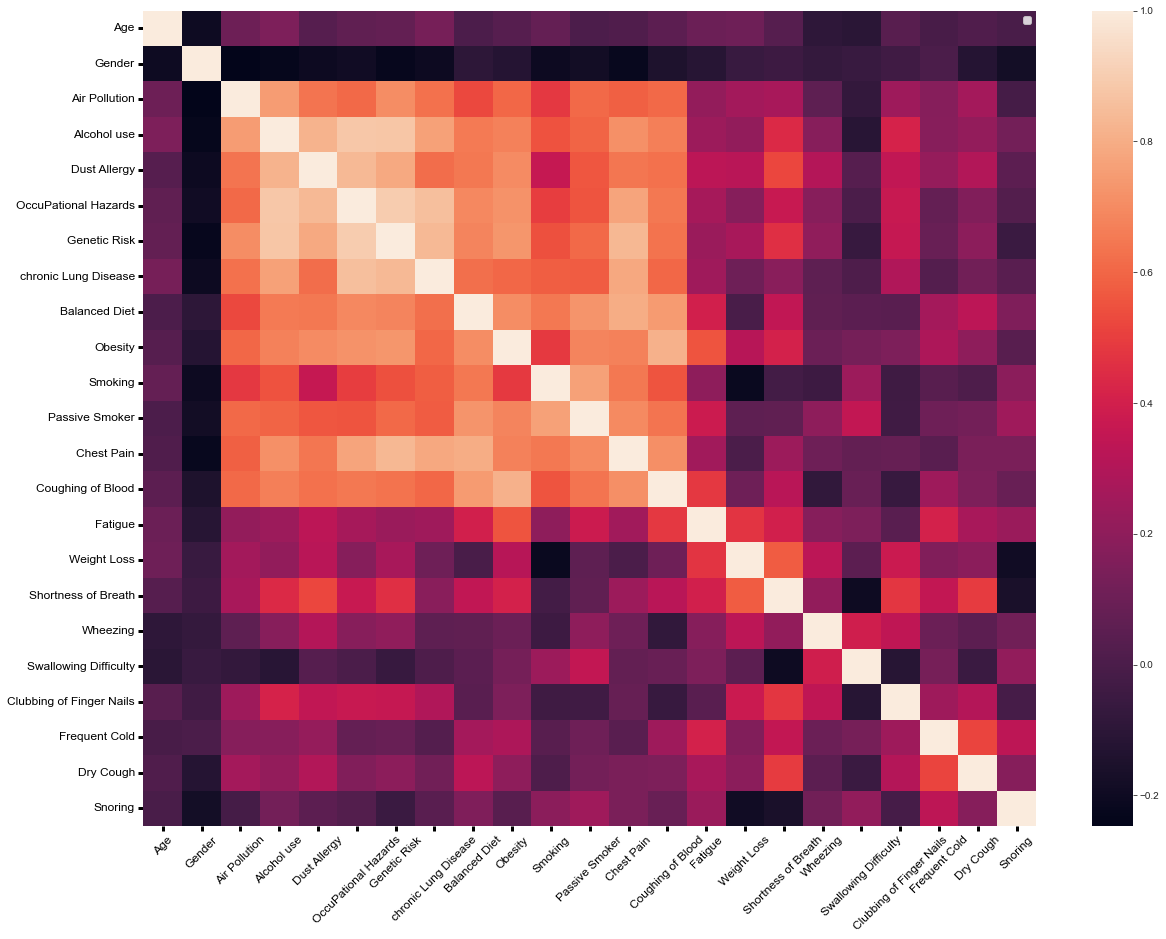

In [102]:
# PLotting the correlatin matrix using the seaborn library
fig, ax = plt.subplots(figsize=(20,15))
plot=sns.heatmap(data=cancer.corr())
Plotter(plot,x_label='',y_label='', save_name='heatmap.png')
plt.xticks(rotation=45);

No handles with labels found to put in legend.


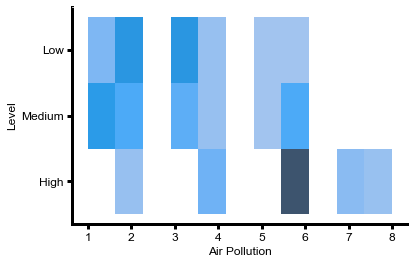

In [103]:
# Plot for Air Pollution vs Level
fig, ax=plt.subplots()
plot = sns.histplot(data=cancer,x='Air Pollution',y='Level')
Plotter(plot, 'Air Pollution', 'Level', legend=False, save=True, save_name='Pollution by Level.png');

# Visualising some important symptoms seen in a cancer patients

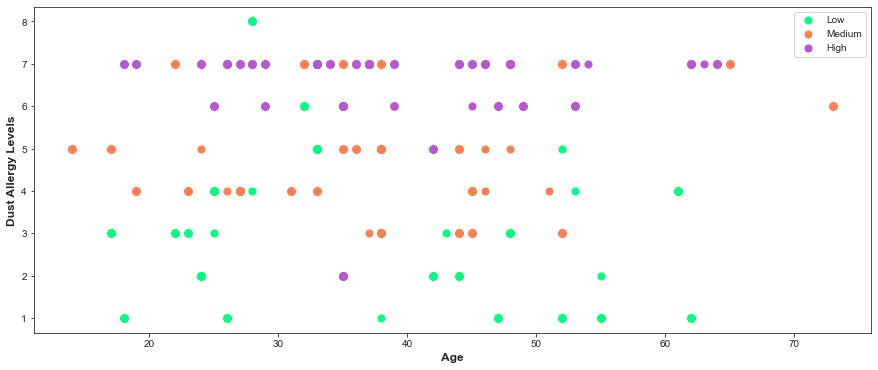

In [104]:
# PLot for Age vs Dust Allergy Levels
data = [ cancer[cancer["Level"]=="Low"] , cancer[cancer["Level"]=="Medium"] , cancer[cancer["Level"]=="High"] ]
labels = ["Low" , "Medium" , "High"]
cm = ["springgreen","coral","mediumorchid"]
plt.figure(figsize=(15,6))
for i , d in enumerate(data):
    plt.scatter(data[i]["Age"] , data[i]["Dust Allergy"] , label=labels[i] , s=50 , c=cm[i] )

plt.xlabel("Age" , fontsize=12 , fontweight="bold")
plt.ylabel("Dust Allergy Levels" , fontsize=12, fontweight="bold")
plt.legend();

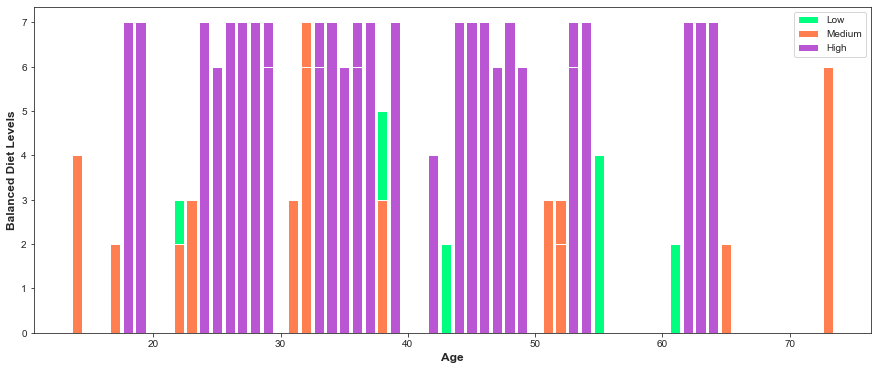

In [105]:
# PLot for Age vs Dust Balanced Diet
data = [ cancer[cancer["Level"]=="Low"] , cancer[cancer["Level"]=="Medium"] , cancer[cancer["Level"]=="High"] ]
labels = ["Low" , "Medium" , "High"]
cm = ["springgreen","coral","mediumorchid"]
plt.figure(figsize=(15,6))
for i , d in enumerate(data):
    plt.bar(data[i]["Age"] , data[i]["Balanced Diet"] , label=labels[i] ,color=cm[i])

plt.xlabel("Age" , fontsize=12 , fontweight="bold")
plt.ylabel("Balanced Diet Levels" , fontsize=12, fontweight="bold")
plt.legend();

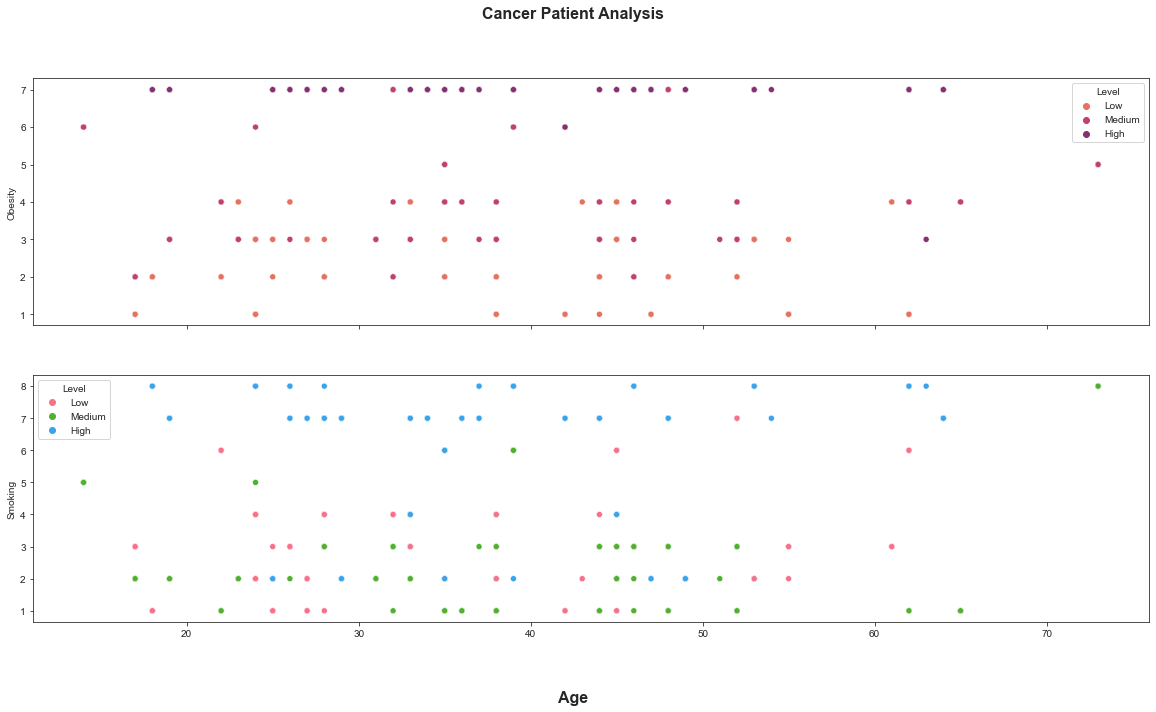

In [106]:
# A simple Plot for brief information about the dataset on Cancer Patient Analysis
fig , (ax0,ax1) = plt.subplots(nrows = 2 , ncols = 1 , figsize=(20,10) , sharex=True)
scatter1 = sns.scatterplot(data=cancer, x = "Age", y="Obesity" , hue="Level" , palette="flare" , ax=ax0 , linewidths=0.05)
scatter2 = sns.scatterplot(data=cancer , x="Age" , y="Smoking" , hue="Level" , palette="husl" , ax=ax1)
ax1.set(xlabel=None , ylabel="Smoking")
fig.suptitle("Cancer Patient Analysis" , fontsize=16 , fontweight="bold")
fig.supxlabel("Age", fontsize=16 , fontweight="bold");

# Modeling

In [107]:
np.random.seed(10)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X = cancer.drop(["Level", "Patient Id"] , axis=1)
y = cancer["Level"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)
classifier = SVC()
classifier.fit(X_train , y_train)
cls = classifier.score(X_test , y_test)
print(f"The Accuracy Achieved is :- {cls*100} %")

The Accuracy Achieved is :- 99.5 %
